# AQI Data Analysis & Visualization

This notebook provides comprehensive analysis and insights into the AQI prediction dataset.

**Objectives:**
1. Exploratory Data Analysis (EDA)
2. Understanding AQI calculation
3. Feature correlation analysis
4. Time series patterns
5. Statistical insights for modeling

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Setup paths
BASE_DIR = Path.cwd().parent
DATA_PATH = BASE_DIR / 'data' / 'processed'

print(f"Data directory: {DATA_PATH}")
print(f"Files available: {list(DATA_PATH.glob('*.csv'))}")

Data directory: d:\Internships and Jobs Data\10 Pearls Shine Internship\Project\AQI Predictor\data\processed
Files available: [WindowsPath('d:/Internships and Jobs Data/10 Pearls Shine Internship/Project/AQI Predictor/data/processed/current_features.csv'), WindowsPath('d:/Internships and Jobs Data/10 Pearls Shine Internship/Project/AQI Predictor/data/processed/historical_features.csv')]


## Load Data

In [2]:
# Load historical features
df = pd.read_csv(DATA_PATH / 'historical_features.csv')

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp
df = df.sort_values('timestamp').reset_index(drop=True)

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total records: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (2132, 120)
Date range: 2025-11-01 00:00:00+00:00 to 2026-01-30 19:00:00+00:00
Total records: 2,132
Total features: 120

Memory usage: 1.95 MB


In [3]:
# Display first few rows
df.head(10)

,timestamp,temperature,humidity,dew_point,precipitation,wind_speed,wind_direction,pressure,aqi,co,...,humidity_change_rate,wind_speed_change_rate,temp_humidity_interaction,wind_pm2_5_interaction,wind_temp_interaction,humidity_pm2_5_interaction,high_pollution_alert,rain_alert,high_pm2_5_alert,high_temp_alert
0,2025-11-01 00:00:00+00:00,22.45,53.880460,12.65,0.0,1.548418,125.537766,1006.7212,5,515.33,...,0.048593,-0.767505,1209.616327,118.794667,34.761995,4133.708891,1,0,1,0
1,2025-11-01 01:00:00+00:00,21.35,56.498665,12.35,0.0,0.360000,270.000000,1007.0077,5,526.95,...,0.048593,-0.767505,1206.246498,27.953998,7.686000,4387.121337,1,0,1,0
2,2025-11-01 02:00:00+00:00,21.20,62.887740,13.85,0.0,0.569210,341.564940,1008.1024,5,529.91,...,0.113084,0.581139,1333.220088,44.580522,12.067251,4925.367797,1,0,1,0
3,2025-11-01 03:00:00+00:00,23.30,51.681416,12.80,0.0,3.362677,105.524180,1008.9237,5,521.83,...,-0.178196,4.907622,1204.176993,263.633877,78.350374,4051.823014,1,0,1,0
4,2025-11-01 04:00:00+00:00,26.55,42.433483,12.75,0.0,2.174948,114.443950,1009.4585,5,497.19,...,-0.178941,-0.353209,1126.608974,168.362740,57.744875,3284.775919,1,0,1,0
5,2025-11-01 05:00:00+00:00,29.45,36.901215,13.20,0.0,2.558281,129.289380,1009.5901,5,482.05,...,-0.130375,0.176249,1086.740782,194.966572,75.341367,2812.241595,1,0,1,0
6,2025-11-01 06:00:00+00:00,31.55,36.064570,14.70,0.0,4.320000,180.000000,1009.2142,5,473.02,...,-0.022673,0.688634,1137.837184,330.696000,136.296000,2760.742833,1,0,1,0
7,2025-11-01 07:00:00+00:00,33.20,29.519459,13.05,0.0,3.420000,180.000000,1008.1355,4,266.53,...,-0.181483,-0.208333,980.046039,176.198390,113.543993,1520.842528,1,0,1,0
8,2025-11-01 08:00:00+00:00,34.25,25.390760,11.65,0.0,1.537921,200.556120,1007.1497,3,220.18,...,-0.139864,-0.550316,869.633530,62.393443,52.673784,1030.103133,0,0,1,0
9,2025-11-01 09:00:00+00:00,34.75,22.577553,10.30,0.0,0.900000,323.130000,1006.2580,3,206.83,...,-0.110796,-0.414794,784.569967,33.327000,31.275000,836.046788,0,0,1,0


## Understanding AQI (Air Quality Index)

The AQI is calculated based on multiple pollutants. Each pollutant has its own sub-index, and the overall AQI is the maximum of all sub-indices.

**AQI Scale (US EPA Standard):**
- **1 (Good)**: 0-50 - Air quality is satisfactory
- **2 (Moderate)**: 51-100 - Acceptable for most people
- **3 (Unhealthy for Sensitive Groups)**: 101-150
- **4 (Unhealthy)**: 151-200 - Everyone may experience health effects
- **5 (Very Unhealthy)**: 201-300 - Health alert
- **6 (Hazardous)**: 301+ - Emergency conditions

**Key Pollutants:**
- **PM2.5**: Fine particulate matter (< 2.5 micrometers)
- **PM10**: Coarse particulate matter (< 10 micrometers)
- **O3**: Ozone
- **NO2**: Nitrogen dioxide
- **SO2**: Sulfur dioxide
- **CO**: Carbon monoxide

## 1. Dataset Overview & Statistics

In [4]:
# Dataset info
print("="*80)
print("DATASET INFORMATION")
print("="*80)
print(f"\nShape: {df.shape}")
print(f"Columns: {df.shape[1]}")
print(f"Rows: {df.shape[0]:,}")
print(f"\nDate Range:")
print(f"  Start: {df['timestamp'].min()}")
print(f"  End: {df['timestamp'].max()}")
print(f"  Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")
print(f"\nMissing Values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

# Data types
print(f"\nData Types:")
print(df.dtypes.value_counts())

DATASET INFORMATION

Shape: (2132, 120)
Columns: 120
Rows: 2,132

Date Range:
  Start: 2025-11-01 00:00:00+00:00
  End: 2026-01-30 19:00:00+00:00
  Duration: 90 days

Missing Values: 0
Duplicates: 0

Data Types:
float64                106
int64                   13
datetime64[ns, UTC]      1
Name: count, dtype: int64


In [5]:
# Feature categories
temporal_features = ['year', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'season', 'time_of_day']
raw_pollution = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
raw_weather = ['temperature', 'humidity', 'wind_speed', 'wind_direction', 'pressure', 'precipitation', 'dew_point']
lag_features = [col for col in df.columns if '_lag_' in col]
rolling_features = [col for col in df.columns if '_rolling_' in col]
change_features = [col for col in df.columns if '_change_rate' in col]
interaction_features = [col for col in df.columns if '_interaction' in col]
alert_features = [col for col in df.columns if '_alert' in col]

print("\n" + "="*80)
print("FEATURE CATEGORIES")
print("="*80)
print(f"\n{'Category':<25} {'Count':<10}")
print("-" * 40)
print(f"{'Temporal Features':<25} {len(temporal_features):<10}")
print(f"{'Raw Pollution':<25} {len(raw_pollution):<10}")
print(f"{'Raw Weather':<25} {len(raw_weather):<10}")
print(f"{'Lag Features':<25} {len(lag_features):<10}")
print(f"{'Rolling Features':<25} {len(rolling_features):<10}")
print(f"{'Change Rate Features':<25} {len(change_features):<10}")
print(f"{'Interaction Features':<25} {len(interaction_features):<10}")
print(f"{'Alert Features':<25} {len(alert_features):<10}")
print("-" * 40)
print(f"{'TOTAL':<25} {len(df.columns):<10}")


FEATURE CATEGORIES

Category                  Count     
----------------------------------------
Temporal Features         8         
Raw Pollution             9         
Raw Weather               7         
Lag Features              20        
Rolling Features          60        
Change Rate Features      7         
Interaction Features      4         
Alert Features            4         
----------------------------------------
TOTAL                     120       


## 2. Target Variable Analysis (AQI)

AQI DISTRIBUTION

AQI Level  Label                     Count      Percentage
------------------------------------------------------------
2          Moderate                  47           2.20%
3          Unhealthy (Sensitive)     529         24.81%
4          Unhealthy                 536         25.14%
5          Very Unhealthy            1020        47.84%

Statistics:         
  Mean AQI: 4.19
  Median AQI: 4
  Mode AQI: 5
  Std Dev: 0.88


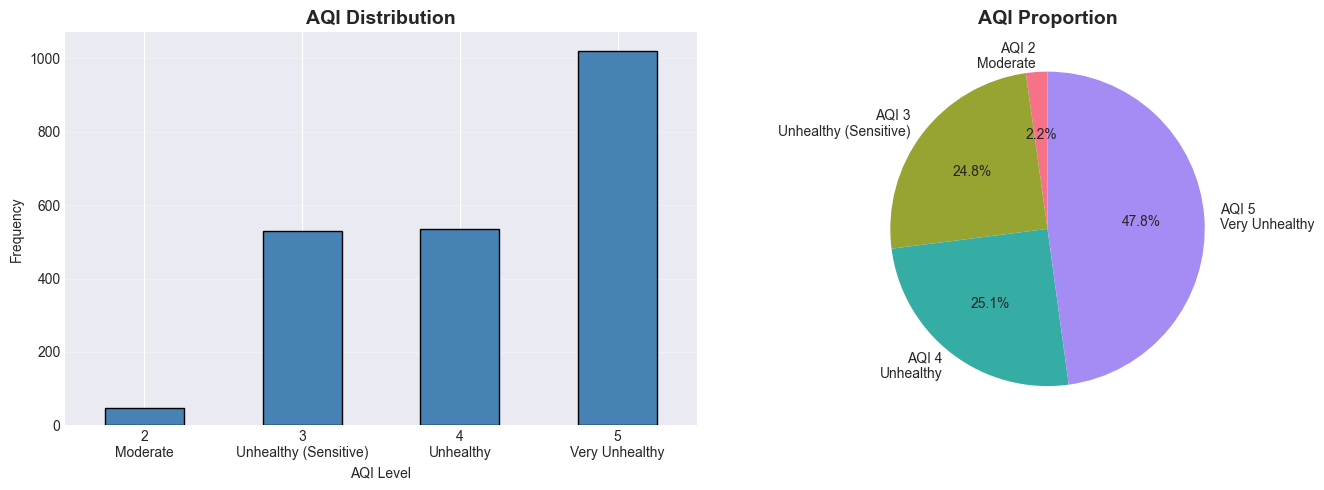

In [6]:
# AQI distribution
print("="*80)
print("AQI DISTRIBUTION")
print("="*80)

aqi_counts = df['aqi'].value_counts().sort_index()
aqi_labels = {1: 'Good', 2: 'Moderate', 3: 'Unhealthy (Sensitive)', 4: 'Unhealthy', 5: 'Very Unhealthy'}

print(f"\n{'AQI Level':<10} {'Label':<25} {'Count':<10} {'Percentage':<10}")
print("-" * 60)
for aqi, count in aqi_counts.items():
    percentage = (count / len(df)) * 100
    label = aqi_labels.get(aqi, 'Unknown')
    print(f"{aqi:<10} {label:<25} {count:<10} {percentage:>6.2f}%")

print(f"\n{'Statistics:':<20}")
print(f"  Mean AQI: {df['aqi'].mean():.2f}")
print(f"  Median AQI: {df['aqi'].median():.0f}")
print(f"  Mode AQI: {df['aqi'].mode()[0]}")
print(f"  Std Dev: {df['aqi'].std():.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
aqi_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('AQI Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AQI Level')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels([f"{int(x)}\n{aqi_labels.get(int(x), '')}" for x in aqi_counts.index], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(aqi_counts, labels=[f"AQI {k}\n{aqi_labels[k]}" for k in aqi_counts.index], 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl', len(aqi_counts)))
axes[1].set_title('AQI Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Pollutant Analysis

POLLUTANT STATISTICS (μg/m³)

           Mean         Median       Std          Min          Max         
--------------------------------------------------------------------------------
PM2_5      81.56        71.79        52.94        5.73         321.82      
PM10       152.86       142.12       82.27        15.88        497.15      
CO         464.35       408.13       242.09       116.61       1650.49     
NO2        5.10         4.08         3.69         0.35         18.95       
O3         98.28        99.53        30.62        29.02        165.50      
SO2        5.14         4.48         3.46         0.27         27.58       


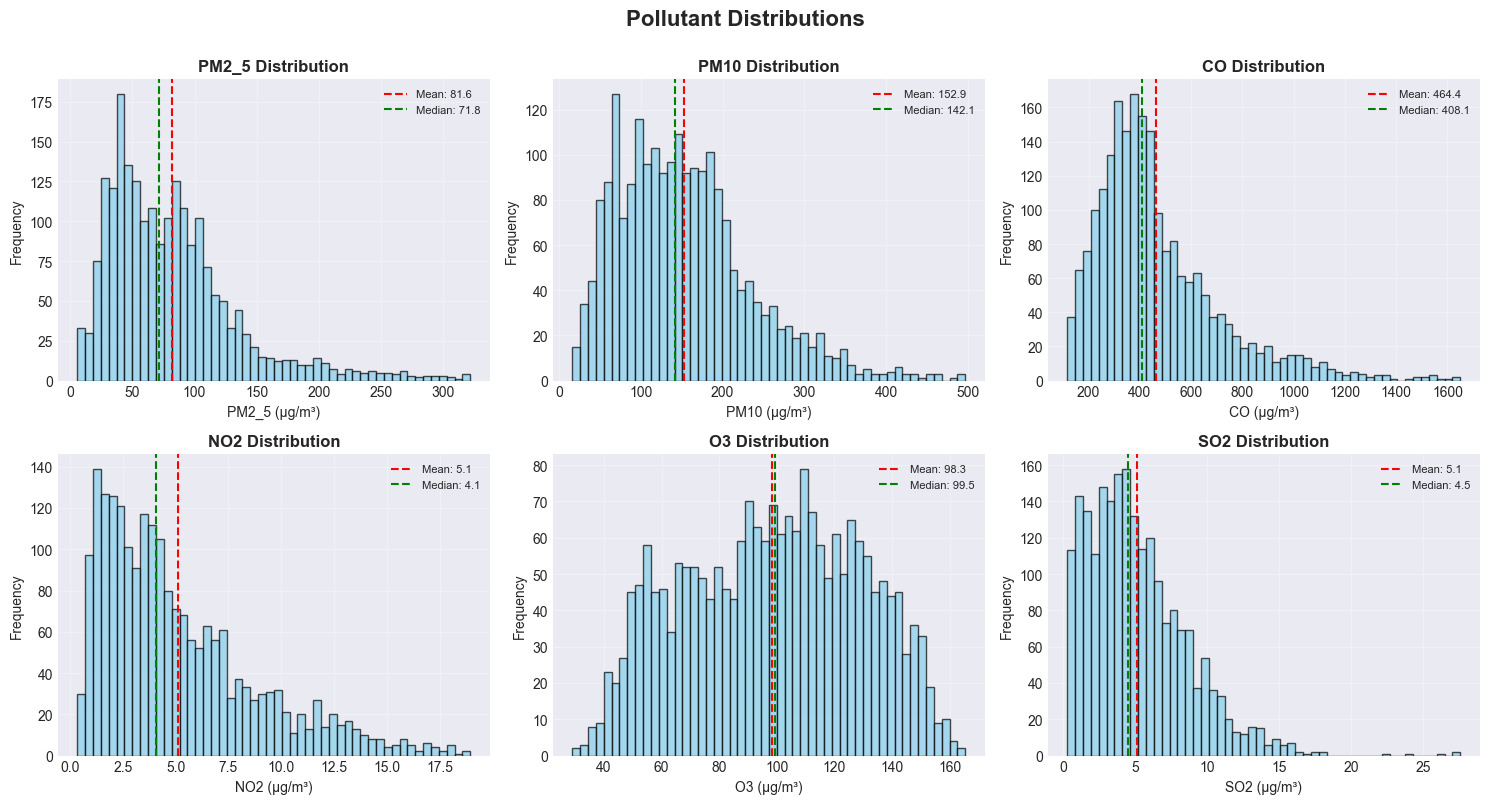

In [7]:
# Pollutant statistics
pollutants = ['pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']

print("="*80)
print("POLLUTANT STATISTICS (μg/m³)")
print("="*80)
print(f"\n{'':<10} {'Mean':<12} {'Median':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
print("-" * 80)
for pol in pollutants:
    print(f"{pol.upper():<10} {df[pol].mean():<12.2f} {df[pol].median():<12.2f} "
          f"{df[pol].std():<12.2f} {df[pol].min():<12.2f} {df[pol].max():<12.2f}")

# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, pol in enumerate(pollutants):
    axes[idx].hist(df[pol], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{pol.upper()} Distribution', fontweight='bold')
    axes[idx].set_xlabel(f'{pol.upper()} (μg/m³)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[pol].mean(), color='red', linestyle='--', label=f'Mean: {df[pol].mean():.1f}')
    axes[idx].axvline(df[pol].median(), color='green', linestyle='--', label=f'Median: {df[pol].median():.1f}')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Pollutant Distributions', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 4. Time Series Analysis

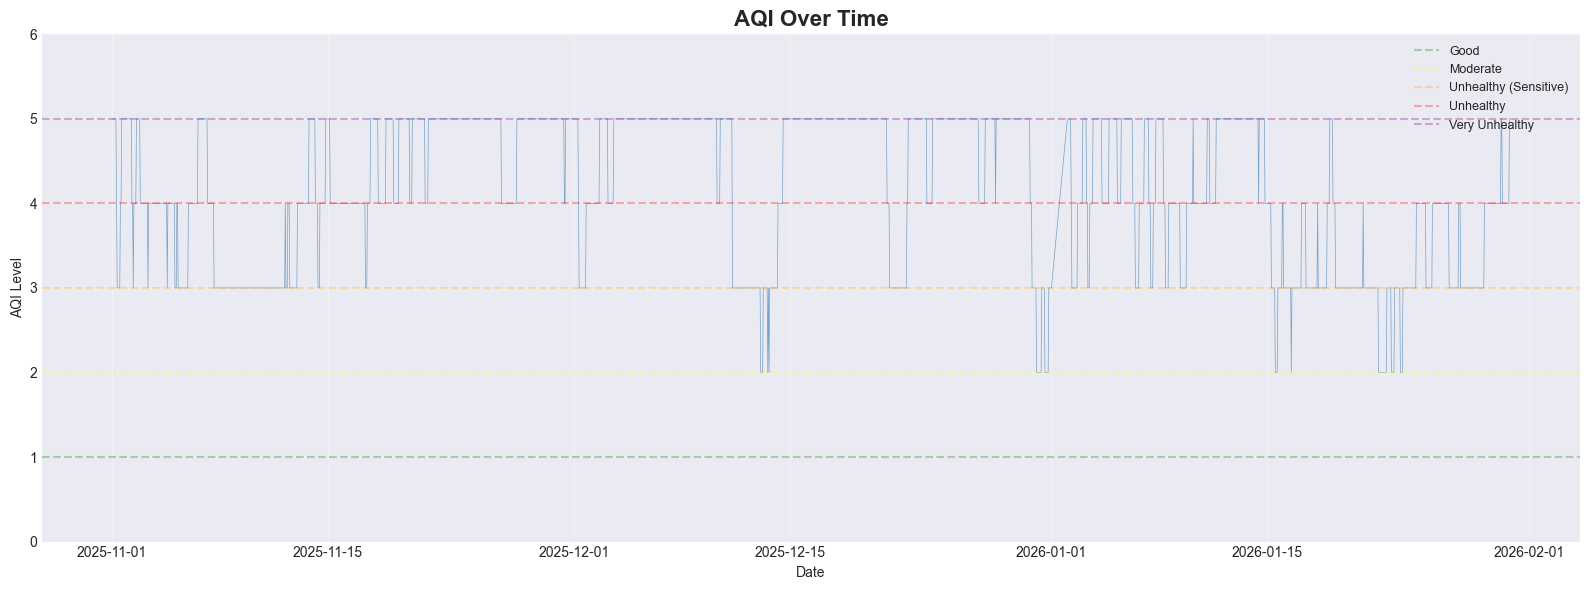

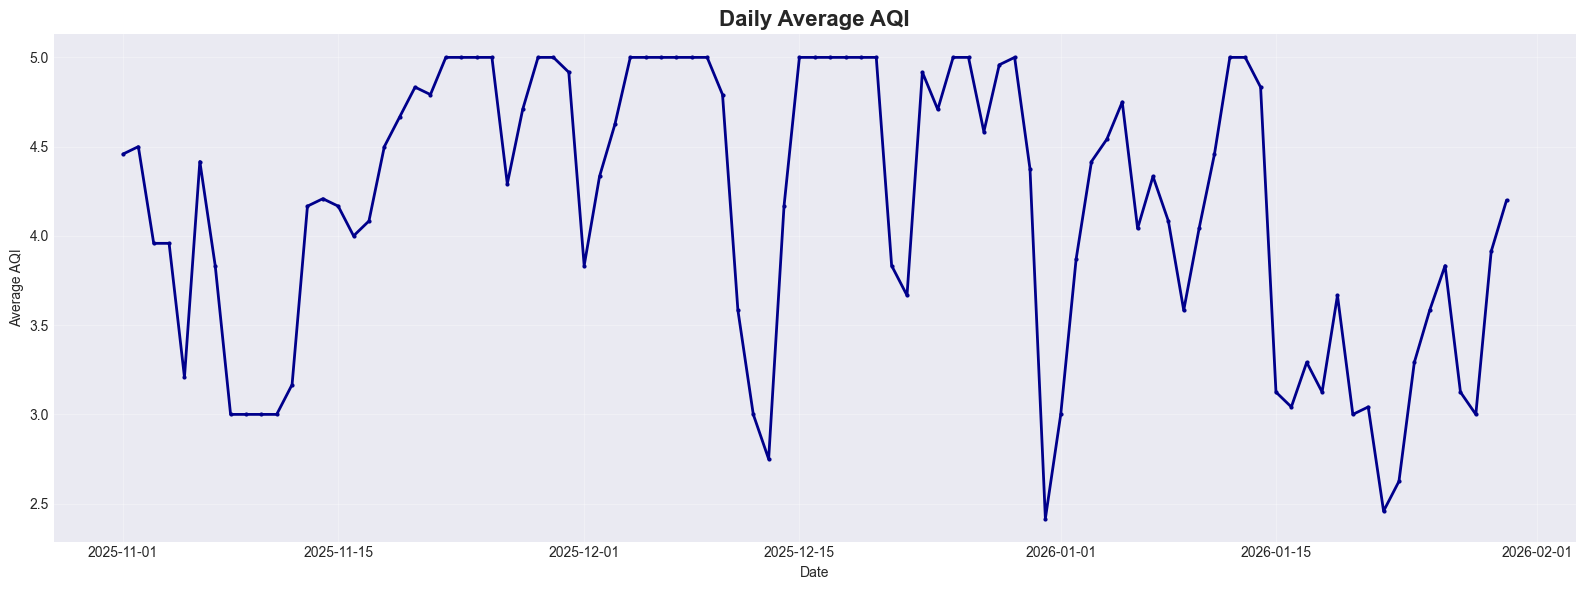

In [8]:
# AQI over time
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['timestamp'], df['aqi'], linewidth=0.5, alpha=0.7, color='steelblue')
ax.set_title('AQI Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('AQI Level')
ax.grid(alpha=0.3)
ax.set_ylim(0, 6)

# Add horizontal lines for AQI levels
aqi_levels = [(1, 'Good'), (2, 'Moderate'), (3, 'Unhealthy (Sensitive)'), (4, 'Unhealthy'), (5, 'Very Unhealthy')]
colors = ['green', 'yellow', 'orange', 'red', 'purple']
for (level, label), color in zip(aqi_levels, colors):
    ax.axhline(y=level, color=color, linestyle='--', alpha=0.3, label=label)

ax.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

# Calculate daily average
df_daily = df.set_index('timestamp').resample('D')['aqi'].mean().reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_daily['timestamp'], df_daily['aqi'], linewidth=2, color='darkblue', marker='o', markersize=2)
ax.set_title('Daily Average AQI', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Average AQI')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

CORRELATION WITH AQI

Feature              Correlation    
----------------------------------------
aqi                        1.0000
pm10                       0.7859
pm2_5                      0.7364
co                         0.5009
pressure                   0.2624
so2                        0.1790
nh3                        0.1785
o3                         0.1108
no2                        0.0626
humidity                   0.0056
no                        -0.0234
precipitation             -0.0311
wind_speed                -0.0749
dew_point                 -0.0910
temperature               -0.1149
wind_direction            -0.1371


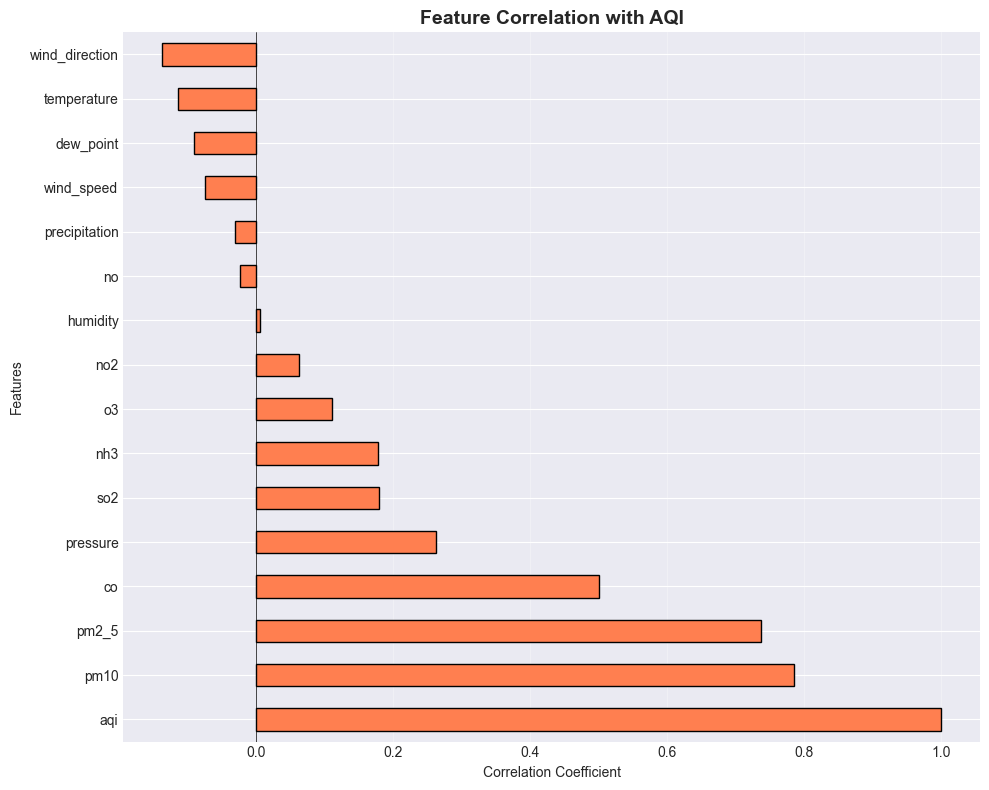

In [9]:
# Correlation with AQI
features_for_corr = raw_pollution + raw_weather
corr_with_aqi = df[features_for_corr].corrwith(df['aqi']).sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH AQI")
print("="*80)
print(f"\n{'Feature':<20} {'Correlation':<15}")
print("-" * 40)
for feature, corr in corr_with_aqi.items():
    print(f"{feature:<20} {corr:>12.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 8))
corr_with_aqi.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_title('Feature Correlation with AQI', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

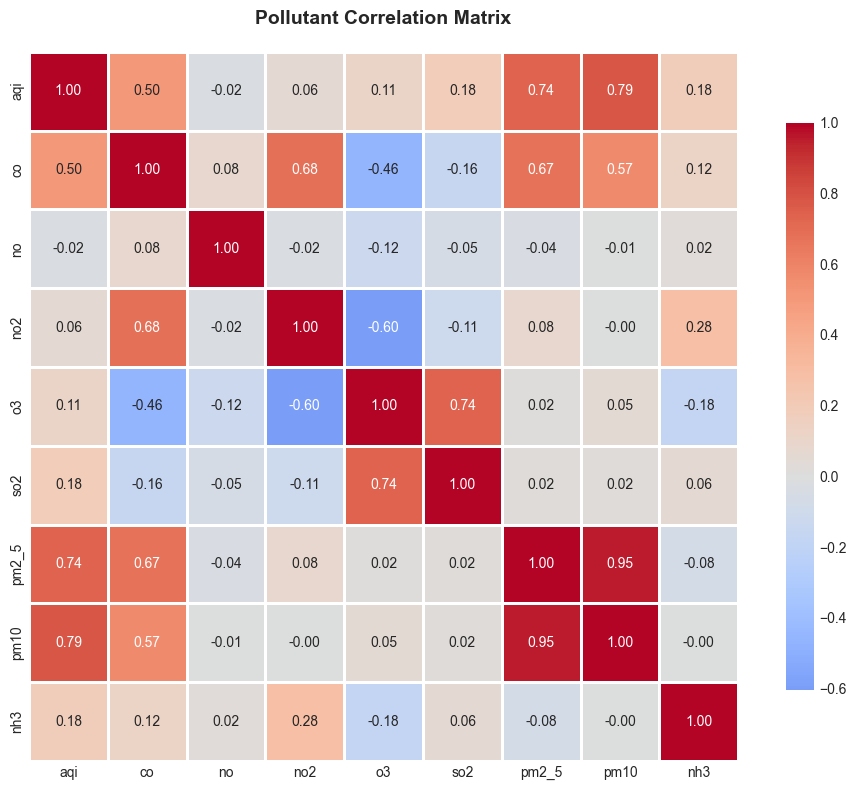


🔍 Key Insights:
  • High positive correlation indicates pollutants that move together
  • PM2.5 and PM10 usually highly correlated (both particulate matter)
  • These correlations help understand which pollutants drive AQI


In [10]:
# Correlation heatmap for pollutants
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df[raw_pollution].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Pollutant Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🔍 Key Insights:")
print("  • High positive correlation indicates pollutants that move together")
print("  • PM2.5 and PM10 usually highly correlated (both particulate matter)")
print("  • These correlations help understand which pollutants drive AQI")

## 5. Weather Impact on AQI

KeyError: 'temperature_2m'

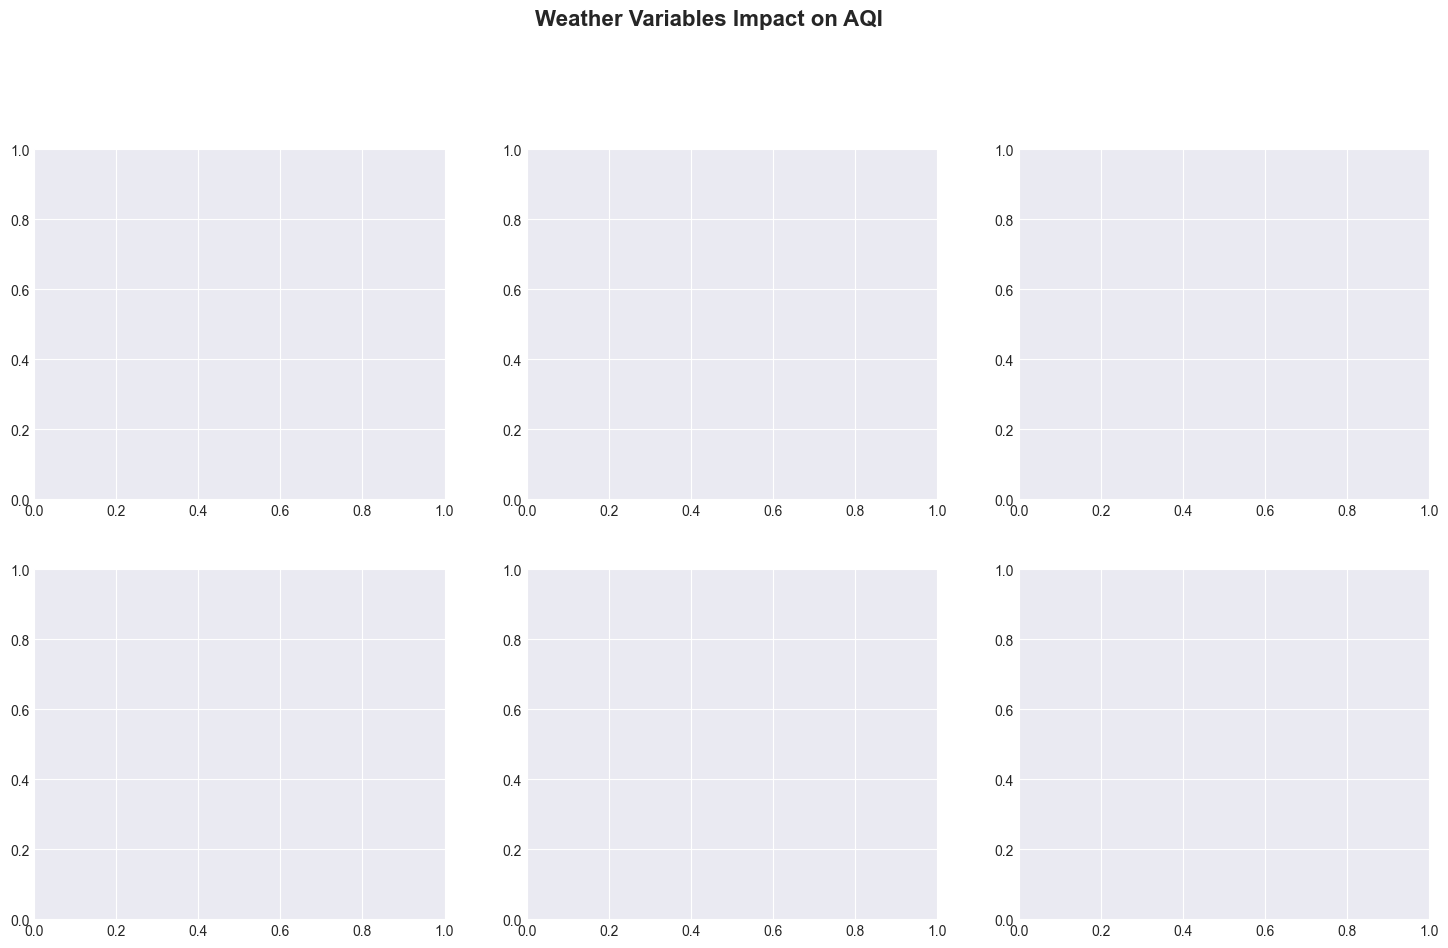

In [11]:
# Weather variables impact on AQI
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Weather Variables Impact on AQI', fontsize=16, fontweight='bold', y=1.02)

weather_vars = ['temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 
                'surface_pressure', 'precipitation', 'cloud_cover']
colors = ['#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#9467bd', '#8c564b']

for idx, (var, color) in enumerate(zip(weather_vars, colors)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Scatter plot with AQI levels
    for aqi_level in sorted(df['aqi'].unique()):
        mask = df['aqi'] == aqi_level
        ax.scatter(df.loc[mask, var], df.loc[mask, 'aqi'], 
                  alpha=0.3, label=f'AQI {aqi_level}', s=20)
    
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('AQI Level', fontsize=10)
    ax.set_title(f'{var.replace("_", " ").title()} vs AQI', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Weather-AQI Correlations:")
for var in weather_vars:
    corr = df[[var, 'aqi']].corr().iloc[0, 1]
    print(f"  • {var:25s}: {corr:+.3f}")

## 6. Temporal Patterns

In [ ]:
# Hourly patterns
hourly_aqi = df.groupby('hour')['aqi'].agg(['mean', 'std', 'count']).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hour of day pattern
axes[0].plot(hourly_aqi['hour'], hourly_aqi['mean'], marker='o', linewidth=2, markersize=8, color='#ff7f0e')
axes[0].fill_between(hourly_aqi['hour'], 
                      hourly_aqi['mean'] - hourly_aqi['std'], 
                      hourly_aqi['mean'] + hourly_aqi['std'], 
                      alpha=0.3, color='#ff7f0e')
axes[0].set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average AQI', fontsize=12, fontweight='bold')
axes[0].set_title('AQI by Hour of Day', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Day of week pattern
dow_aqi = df.groupby('weekday')['aqi'].mean()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(range(7), dow_aqi.values, color='#2ca02c', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average AQI', fontsize=12, fontweight='bold')
axes[1].set_title('AQI by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(dow_names)
axes[1].grid(True, alpha=0.3, axis='y')

# Month pattern
monthly_aqi = df.groupby('month')['aqi'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[2].plot(monthly_aqi.index, monthly_aqi.values, marker='o', linewidth=2, markersize=8, color='#d62728')
axes[2].set_xlabel('Month', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Average AQI', fontsize=12, fontweight='bold')
axes[2].set_title('AQI by Month (Seasonal Pattern)', fontsize=14, fontweight='bold')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(month_names, rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🕐 Key Temporal Insights:")
print(f"  • Highest AQI hour: {hourly_aqi.loc[hourly_aqi['mean'].idxmax(), 'hour']:.0f}:00 (avg: {hourly_aqi['mean'].max():.2f})")
print(f"  • Lowest AQI hour: {hourly_aqi.loc[hourly_aqi['mean'].idxmin(), 'hour']:.0f}:00 (avg: {hourly_aqi['mean'].min():.2f})")
print(f"  • Worst day: {dow_names[dow_aqi.idxmax()]} (avg: {dow_aqi.max():.2f})")
print(f"  • Best day: {dow_names[dow_aqi.idxmin()]} (avg: {dow_aqi.min():.2f})")
print(f"  • Worst month: {month_names[monthly_aqi.idxmax()-1]} (avg: {monthly_aqi.max():.2f})")
print(f"  • Best month: {month_names[monthly_aqi.idxmin()-1]} (avg: {monthly_aqi.min():.2f})")

## 7. Lag Features Analysis

In [ ]:
# Analyze lag feature importance
lag_features = [col for col in df.columns if '_lag_' in col]

# Select top lag features based on correlation with AQI
lag_corr = df[lag_features + ['aqi']].corr()['aqi'].drop('aqi').sort_values(ascending=False)

# Plot top 20 lag features
fig, ax = plt.subplots(figsize=(12, 8))
top_20_lag = lag_corr.head(20)
colors_lag = ['#2ca02c' if x > 0 else '#d62728' for x in top_20_lag.values]
ax.barh(range(len(top_20_lag)), top_20_lag.values, color=colors_lag, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_20_lag)))
ax.set_yticklabels(top_20_lag.index, fontsize=9)
ax.set_xlabel('Correlation with AQI', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Lag Features by AQI Correlation', fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\n📈 Lag Features Summary:")
print(f"  • Total lag features: {len(lag_features)}")
print(f"  • Strongest correlation: {lag_corr.iloc[0]:.3f} ({lag_corr.index[0]})")
print(f"  • Average correlation: {lag_corr.abs().mean():.3f}")
print(f"\n  Top 5 Lag Features:")
for i, (feat, corr) in enumerate(lag_corr.head(5).items(), 1):
    print(f"    {i}. {feat:40s}: {corr:+.3f}")

## 8. Rolling Features Analysis

In [ ]:
# Analyze rolling feature importance
rolling_features = [col for col in df.columns if '_rolling_' in col]

# Select top rolling features based on correlation with AQI
rolling_corr = df[rolling_features + ['aqi']].corr()['aqi'].drop('aqi').sort_values(ascending=False)

# Plot top 20 rolling features
fig, ax = plt.subplots(figsize=(12, 8))
top_20_rolling = rolling_corr.head(20)
colors_rolling = ['#1f77b4' if x > 0 else '#ff7f0e' for x in top_20_rolling.values]
ax.barh(range(len(top_20_rolling)), top_20_rolling.values, color=colors_rolling, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(top_20_rolling)))
ax.set_yticklabels(top_20_rolling.index, fontsize=9)
ax.set_xlabel('Correlation with AQI', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Rolling Features by AQI Correlation', fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print(f"\n📊 Rolling Features Summary:")
print(f"  • Total rolling features: {len(rolling_features)}")
print(f"  • Strongest correlation: {rolling_corr.iloc[0]:.3f} ({rolling_corr.index[0]})")
print(f"  • Average correlation: {rolling_corr.abs().mean():.3f}")
print(f"\n  Top 5 Rolling Features:")
for i, (feat, corr) in enumerate(rolling_corr.head(5).items(), 1):
    print(f"    {i}. {feat:40s}: {corr:+.3f}")

## 9. Feature Engineering Validation

In [ ]:
# Compare all feature categories correlation
feature_categories = {
    'Raw Pollution': raw_pollution,
    'Raw Weather': raw_weather,
    'Temporal': temporal_features,
    'Lag Features': lag_features[:20],  # Top 20
    'Rolling Features': rolling_features[:20],  # Top 20
    'Change Rate': [col for col in df.columns if '_change_rate' in col],
    'Interaction': [col for col in df.columns if '_x_' in col],
    'Alerts': [col for col in df.columns if col.startswith(('high_', 'rain_'))]
}

# Calculate average absolute correlation for each category
category_performance = {}
for cat_name, features in feature_categories.items():
    valid_features = [f for f in features if f in df.columns and f != 'aqi']
    if valid_features:
        corr_vals = df[valid_features + ['aqi']].corr()['aqi'].drop('aqi', errors='ignore')
        category_performance[cat_name] = corr_vals.abs().mean()

# Plot category comparison
fig, ax = plt.subplots(figsize=(12, 6))
categories = list(category_performance.keys())
values = list(category_performance.values())
colors_cat = plt.cm.Set3(range(len(categories)))

bars = ax.bar(categories, values, color=colors_cat, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Average Absolute Correlation with AQI', fontsize=12, fontweight='bold')
ax.set_title('Feature Category Performance Comparison', fontsize=14, fontweight='bold', pad=20)
ax.set_ylim(0, max(values) * 1.2)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🏆 Feature Category Rankings:")
sorted_cats = sorted(category_performance.items(), key=lambda x: x[1], reverse=True)
for rank, (cat, score) in enumerate(sorted_cats, 1):
    print(f"  {rank}. {cat:20s}: {score:.3f}")

## 10. Key Insights & Recommendations for Modeling

In [ ]:
# Final comprehensive summary
print("=" * 80)
print(" " * 20 + "📋 COMPREHENSIVE DATA INSIGHTS SUMMARY")
print("=" * 80)

print("\n🎯 DATASET OVERVIEW:")
print(f"  • Total Records: {len(df):,}")
print(f"  • Date Range: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"  • Total Features: {len(df.columns) - 1}")  # Exclude target
print(f"  • Target Variable: AQI (1-5 scale)")
print(f"  • Missing Values: {df.isnull().sum().sum()}")

print("\n📊 TARGET DISTRIBUTION:")
aqi_dist = df['aqi'].value_counts(normalize=True).sort_index()
for aqi_level, pct in aqi_dist.items():
    print(f"  • AQI Level {aqi_level}: {pct*100:.1f}%")

print("\n🔝 TOP 10 FEATURES (by Correlation with AQI):")
all_features = [col for col in df.columns if col not in ['aqi', 'timestamp']]
all_corr = df[all_features + ['aqi']].corr()['aqi'].drop('aqi').sort_values(ascending=False, key=abs)
for i, (feat, corr) in enumerate(all_corr.head(10).items(), 1):
    print(f"  {i:2d}. {feat:45s}: {corr:+.4f}")

print("\n⏰ TEMPORAL PATTERNS:")
print(f"  • Peak AQI Hour: {hourly_aqi.loc[hourly_aqi['mean'].idxmax(), 'hour']:.0f}:00")
print(f"  • Best AQI Hour: {hourly_aqi.loc[hourly_aqi['mean'].idxmin(), 'hour']:.0f}:00")
print(f"  • Weekday vs Weekend: {'Weekday' if df[df['is_weekend']==0]['aqi'].mean() > df[df['is_weekend']==1]['aqi'].mean() else 'Weekend'} has higher AQI")

print("\n🌤️ WEATHER IMPACT:")
weather_impact = {}
for var in weather_vars:
    weather_impact[var] = abs(df[[var, 'aqi']].corr().iloc[0, 1])
top_weather = sorted(weather_impact.items(), key=lambda x: x[1], reverse=True)[:3]
for i, (var, corr) in enumerate(top_weather, 1):
    print(f"  {i}. {var.replace('_', ' ').title():25s}: {corr:.3f}")

print("\n🤖 MODELING RECOMMENDATIONS:")
print("  ✓ Algorithm: Tree-based models (XGBoost, LightGBM, Random Forest)")
print("  ✓ Reason: Non-linear relationships, high-dimensional feature space")
print("  ✓ Feature Selection: Use top 30-50 features by correlation/importance")
print("  ✓ Cross-Validation: Time-series split (preserve temporal order)")
print("  ✓ Evaluation Metrics: Accuracy, F1-Score, Confusion Matrix, MAE")
print("  ✓ Class Imbalance: Consider class weights or SMOTE if needed")

print("\n📁 NEXT STEPS:")
print("  1. Feature Selection: Select top features from analysis")
print("  2. Train-Test Split: Use time-based split (e.g., 80-20)")
print("  3. Model Training: Train XGBoost, LightGBM, Random Forest")
print("  4. Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV")
print("  5. Model Evaluation: Compare models on validation set")
print("  6. Feature Importance: Analyze SHAP values or feature importances")
print("  7. Prediction Pipeline: Deploy best model with real-time data")
print("  8. Dashboard: Create Streamlit app for visualization")

print("\n" + "=" * 80)
print(" " * 25 + "✅ ANALYSIS COMPLETE!")
print("=" * 80)